# Análise explorátora 

## 0.0 - Sobre o Consumidor.gov

Consumidor.gov é uma ferramenta, pública e gratuita, que intermedia conflitos entre empresas e consumidores, buscando a resolução dos problemas sem a necessidade de meios mais formais, como PROCON e JEC.

A partir da abertura da reclamação, a empresa tem até 10 dias para responder ao consumidor. Passados esses dias, o consumidor tem até 20 dias para avaliar a reclamação.

Caso opte por avaliar, o cliente pode dizer se seu problema foi resolvido ou não, e dar uma nota à experiência com a empresa que varia de 1 a 5.

Para saber mais, acesse: https://www.consumidor.gov.br

Os dados foram baixados de: https://www.consumidor.gov.br/pages/dadosabertos/externo/


### 0.1 - Objetivo da análise

Esta análise foi desenvolvida para identificar quais  padrões e fatores influenciam a satisfação do consumidor, além da eficiência das empresas dos segmentos de produtos eletrônicos, como telefonia e informática, na resolução dos problemas.

Para isso, a análise foi dividida e objetivos, listados de 1 a 5. São eles:


#### 1. Distribuição geográfica das reclamações

Explorar como as reclamações estão distribuídas pelo Brasil para identificar padrões regionais.

**Perguntas:**


- Quais regiões do Brasil têm o maior número de reclamações?

- Existem diferenças significativas na "Situação" das reclamações entre diferentes estados ou cidades?

- Como a satisfação dos consumidores varia entre diferentes regiões?



#### 2. Análise da satisfação do consumidor

Identificar os principais fatores que influenciam a satisfação do consumidor.

**Perguntas:**

- Quais segmentos de mercado têm as melhores e piores avaliações?

- Existe correlação entre o "Tempo Resposta" e a "Nota do Consumidor"?

- Como a satisfação varia entre diferentes gêneros?


#### 3. Perfil dos consumidores 

- Como a distribuição das faixas etárias dos consumidores varia entre diferentes regiões?

- Quantos consumidores fizeram contato  com a empresa  antes de  procurarem o  consumidor.gov?

- Em quais meses os consumidores registraram mais reclamações?



### 0.2 - Sobre os dados


Os dados são de reclamações registradas de julho de 2023 a junho de 2024.

As colunas são do dataset são:


- **Região**:

  - Indica a região do Brasil onde o consumidor está localizado.
 
- **UF**:

  - Sigla do estado da federação.

- **Cidade**:

  - Nome da cidade onde o consumidor está localizado.

- **Sexo**:

  - Sexo do consumidor (Masculino, feminino e Outros).

- **Faixa Etária**:

  - Faixa etária do consumidor, categorizada em intervalos de idade (até 20 anos, entre 21 a 30 anos, entre 31 a 40 anos, entre 41 a 50 anos, entre 51 a 60 anos, entre 61 a 70 anos, mais de 70 anos).

- **Data Finalização**:

  - Data em que a reclamação foi finalizada.

- **Tempo Resposta**:

  - Tempo que a empresa levou para responder à reclamação, medido em dias.

- **Nome Fantasia**:

  - Nome comercial da empresa que recebeu a reclamação.

- **Segmento de Mercado**:

  - Setor ou indústria em que a empresa opera.
- **Como Comprou/Contratou**:

  - Indica como o consumidor adquiriu o produto ou serviço (e.g., Online, Loja Física).

- **Procurou Empresa**:

  - Indica se o consumidor tentou resolver o problema diretamente com a empresa antes de registrar a reclamação.

- **Respondida**:

  - Indica se a empresa respondeu à reclamação do consumidor.

- **Situação**:

  - Situação atual da reclamação, indicando se foi resolvida.

- **Avaliação Reclamação**:

  - Avaliação do consumidor sobre a resolução da reclamação, geralmente indicando satisfação ou insatisfação.

- **Nota do Consumidor**:

  - Nota dada pelo consumidor, geralmente em uma escala de 1 a 5, avaliando o atendimento e a resolução do problema.






## 1.0 - Conhecendo o dataset

O primeiro passo será importar as biblioteca que serão usadas na análise de dados. 

In [27]:
import pandas as pd
import geopandas as gpd
from unidecode import unidecode

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Após isso, carregaremos os dados. 

In [40]:

data_juny = pd.read_csv('../data/raw/finalizadas_2023-07.csv',sep=';')
data_august = pd.read_csv('../data/raw/finalizadas_2023-08.csv',sep=';')
data_september = pd.read_csv('../data/raw/finalizadas_2023-09.csv',sep=';')
data_october = pd.read_csv('../data/raw/finalizadas_2023-10.csv',sep=';')
data_november = pd.read_csv('../data/raw/finalizadas_2023-11.csv',sep=';')
data_december = pd.read_csv('../data/raw/finalizadas_2023-12.csv',sep=';')
data_january = pd.read_csv('../data/raw/finalizadas_2024-01.csv',sep=';')
data_february = pd.read_csv('../data/raw/finalizadas_2024-02.csv',sep=';')
data_march= pd.read_csv('../data/raw/finalizadas_2024-03.csv',sep=';')
data_april = pd.read_csv('../data/raw/finalizadas_2024-04.csv',sep=';')
data_may = pd.read_csv('../data/raw/finalizadas_2024-05.csv',sep=';')
data_june = pd.read_csv('../data/raw/finalizadas_2024-06.csv',sep=';')

info_states = gpd.read_file('../data/external/bcim_2016.gpkg')

Como estão em arquivos diferentes, serão concatenados em um únic arquivo.

In [4]:
data = pd.concat([
    data_juny, data_august,data_september,
    data_october,data_november,data_december,
    data_january, data_february, 
    data_march, data_april,data_may, data_june,
    ], ignore_index=True)

Agora, uma olhada no DataFrame para ter uma visão geral dos dados 

In [5]:
data.sample(5)

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
1190121,CO,DF,Brasília,F,entre 31 a 40 anos,2024-04-25,1.0,Latam Airlines (Tam),Transporte Aéreo,Transportes,Aéreo,Vício de Qualidade,Cancelamento de voo,Internet,S,S,Finalizada avaliada,Resolvida,5.0
995396,CO,GO,Goiânia,M,entre 31 a 40 anos,2024-03-18,10.0,Banco Santander Cartões,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
961464,SE,MG,Belo Horizonte,F,entre 31 a 40 anos,2024-02-26,0.0,Cemig,Energia Elétrica,"Água, Energia, Gás",Energia Elétrica,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Telefone,S,S,Finalizada avaliada,Resolvida,5.0
908742,S,PR,Curitiba,M,entre 21 a 30 anos,2024-02-16,1.0,Oi Fixo,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Atendimento / SAC,SAC - Dificuldade de contato / acesso,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
1152989,SE,RJ,Rio de Janeiro,M,entre 21 a 30 anos,2024-04-25,5.0,ConectCar,Empresas de Pagamento Eletrônico,Serviços Financeiros,Serviço de pagamento online/ via celular/ maqu...,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN


In [6]:
data.shape

(1309315, 19)

Há 1.309.315 linhas e 19 colunas.

### 1.1 - Ajustando os dados

Primeiro, teremos um overview nas caracteristicas dos dados.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309315 entries, 0 to 1309314
Data columns (total 19 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Região                  1309315 non-null  object 
 1   UF                      1309315 non-null  object 
 2   Cidade                  1309315 non-null  object 
 3   Sexo                    1309275 non-null  object 
 4   Faixa Etária            1309315 non-null  object 
 5   Data Finalização        1309315 non-null  object 
 6   Tempo Resposta          1278127 non-null  float64
 7   Nome Fantasia           1309315 non-null  object 
 8   Segmento de Mercado     1309315 non-null  object 
 9   Área                    1309315 non-null  object 
 10  Assunto                 1309315 non-null  object 
 11  Grupo Problema          1309315 non-null  object 
 12  Problema                1309315 non-null  object 
 13  Como Comprou Contratou  1309315 non-null  object 
 14  Pr

Depois disso, iremos verificar se há linhas duplicadas. 

In [8]:
data.duplicated().sum()

5244

Para que nossa análise não seja influenciada pelos registros duplicados, iremos excluí-los.

In [9]:
data = data.drop_duplicates()

O código abaixo verifica se em cada coluna  há valores ausentes e, caso haja, soma-os. 

Com isso, observamos que as colunas ```Sexo, Tempo Resposta, Avaliação Reclamação e Nota do Consumidor``` possuem valores do tipo ```NaN```.

In [10]:

data.isnull().sum()

Região                         0
UF                             0
Cidade                         0
Sexo                          40
Faixa Etária                   0
Data Finalização               0
Tempo Resposta             30682
Nome Fantasia                  0
Segmento de Mercado            0
Área                           0
Assunto                        0
Grupo Problema                 0
Problema                       0
Como Comprou Contratou         0
Procurou Empresa               0
Respondida                     0
Situação                       0
Avaliação Reclamação           4
Nota do Consumidor        710157
dtype: int64

Excluiremos as as linhas que possuem valores nulos das colunas ```Sexo``` e ```Avaliação Reclamação```.

In [15]:

data = data.dropna(subset=['Sexo', 'Avaliação Reclamação'])

In [19]:
data['Segmento de Mercado'].value_counts().head(20)

Segmento de Mercado
Bancos, Financeiras e Administradoras de Cartão                            377255
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    167548
Viagens, Turismo e Hospedagem                                              105273
Transporte Aéreo                                                            89104
Comércio Eletrônico                                                         82491
Provedores de Conteúdo e Outros Serviços na Internet                        62841
Energia Elétrica                                                            56016
Empresas de Intermediação de Serviços / Negócios                            41835
Seguros, Capitalização e Previdência                                        41765
Empresas de Pagamento Eletrônico                                            39913
Programas de Fidelidade                                                     35812
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       28

Agora, filtraremos os dados para obter apenas as empresas do segmento de produtos eletrônicos. 

In [24]:
data['Segmento de Mercado'].value_counts().head(20)

Segmento de Mercado
Bancos, Financeiras e Administradoras de Cartão                            377255
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    167548
Viagens, Turismo e Hospedagem                                              105273
Transporte Aéreo                                                            89104
Comércio Eletrônico                                                         82491
Provedores de Conteúdo e Outros Serviços na Internet                        62841
Energia Elétrica                                                            56016
Empresas de Intermediação de Serviços / Negócios                            41835
Seguros, Capitalização e Previdência                                        41765
Empresas de Pagamento Eletrônico                                            39913
Programas de Fidelidade                                                     35812
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       28

In [25]:
data_segment = data[data['Segmento de Mercado'] == 'Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática']

O código abaixo padroniza os nomes das colunas. 


In [28]:
data_segment.rename(columns=lambda x: unidecode(x).lower().replace(' ','_'), inplace=True)

/tmp/ipykernel_27825/2435496462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_segment.rename(columns=lambda x: unidecode(x).lower().replace(' ','_'), inplace=True)


In [29]:
data_segment.sample(1)

,regiao,uf,cidade,sexo,faixa_etaria,data_finalizacao,tempo_resposta,nome_fantasia,segmento_de_mercado,area,assunto,grupo_problema,problema,como_comprou_contratou,procurou_empresa,respondida,situacao,avaliacao_reclamacao,nota_do_consumidor
50135,SE,RJ,Rio de Janeiro,M,entre 21 a 30 anos,2023-07-24,10.0,Apple,"Fabricantes - Eletroeletrônicos, Produtos de ...",Produtos de Telefonia e Informática,Aparelho celular,Vício de Qualidade,Produto danificado / não funciona - Dificuldad...,Loja física,S,S,Finalizada avaliada,Não Resolvida,3.0


data

Index(['Região', 'UF', 'Cidade', 'Sexo', 'Faixa Etária', 'Data Finalização',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor'],
      dtype='object')

## 2.0 - Respondendo às perguntas


### 2.1 - Distribuição geográfica das reclamações

***1° Pergunta*** 
- Quais regiões, estados e cidades do Brasil têm o maior número de reclamações?

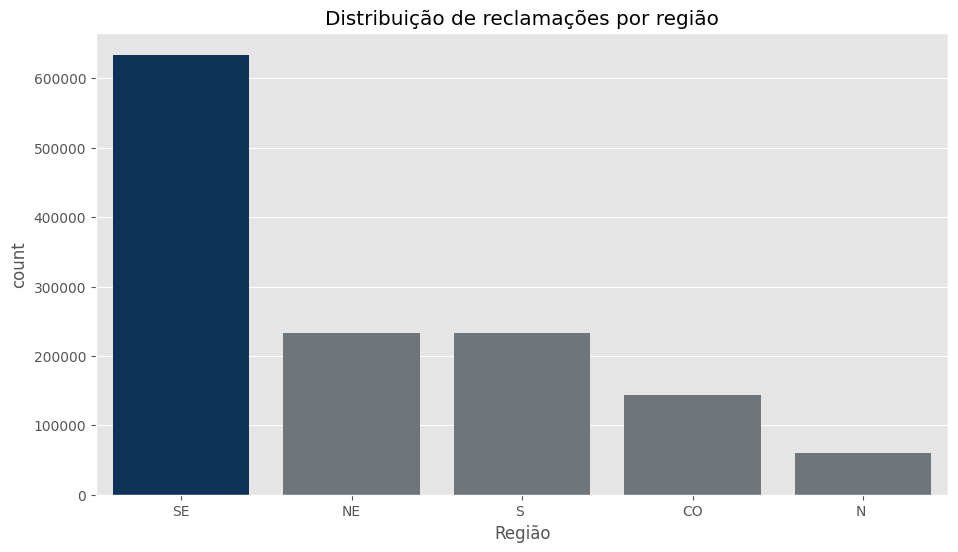

In [31]:
recurrence_by_region = data_segment['regiao'].value_counts()


ax = sns.countplot(data, x='Região', 
                   palette=['#003366', '#6c757d', '#6c757d', '#6c757d', '#6c757d'], 
                   order=recurrence_by_region.index)

ax.set_title('Distribuição de reclamações por região')
ax.figure.set_size_inches(11, 6)

A região com o maior número de reclamações é a sudeste, com 14.226 registros, equivalentes a quase 50% das ocorrências, seguida pela região nordeste e sul, com 6.319 e 4.665, respectivamente.

Abaixo, veremos os Estados com mais reclamações.

In [46]:
recurrence_by_state = data_segment['uf'].value_counts()
df_recurrence_by_state = recurrence_by_state.reset_index()
df_recurrence_by_state.columns = ['uf', 'frequencia']

location_states = info_states[['sigla','geometry']]
location_states.rename({'sigla':'uf'}, axis = 1, inplace=True)
map_brazil  =  location_states.merge(df_recurrence_by_state, on= 'uf', how='left')

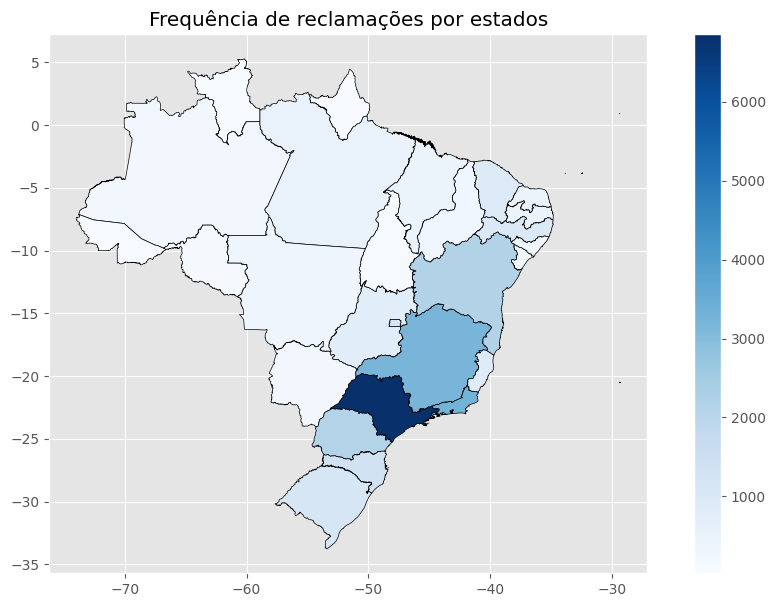

In [47]:
map_brazil.plot( column = 'frequencia',
             cmap = 'Blues',
             figsize = (12,7),
             linewidth=0.5,   
             legend = True,
             edgecolor  = 'black',
             )
plt.title('Frequência de reclamações por estados')

plt.show()

São Paulo lidera os estados com mais reclamações, com o dobro de registros do segundo colocado, Rio de Janeiro. O terceiro lugar pertence ao estado de Minas Gerais. 

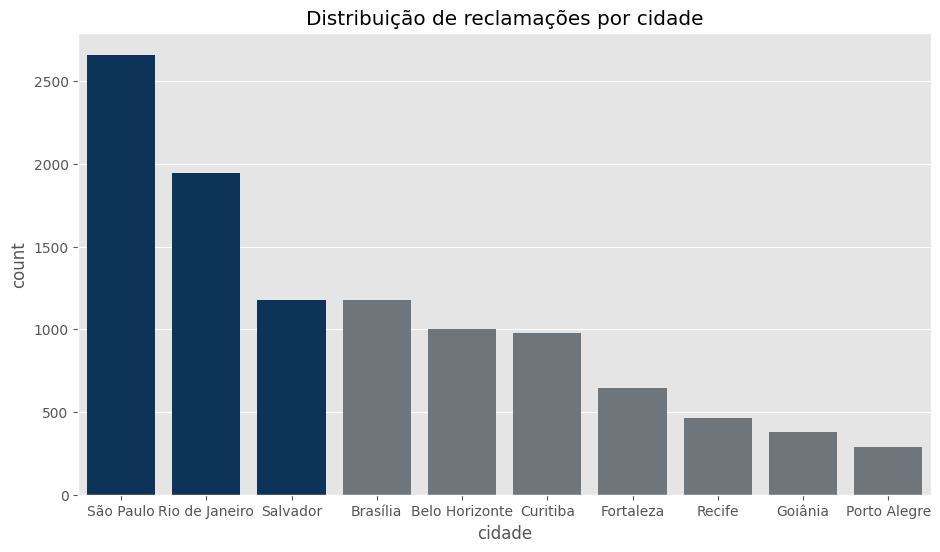

In [50]:
recurrence_by_city = data_segment['cidade'].value_counts().head(10)

ax = sns.countplot(data=data_segment, x='cidade', palette=[

    '#003366', '#003366', '#003366', '#6c757d', '#6c757d',
    '#6c757d', '#6c757d', '#6c757d', '#6c757d', '#6c757d'], 

     order=recurrence_by_city.index)

ax.set_title('Distribuição de reclamações por cidade')
ax.figure.set_size_inches(11, 6)

São Paulo, Rio de Janeiro e Salvador são as cidades com mais reclamações.

Até o 5° lugar, todas as cidades possuem mais de mil reclamações.

_____

***2° Pergunta*** 
- Existem diferenças significativas na "Situação" das reclamações entre diferentes estados e cidades?

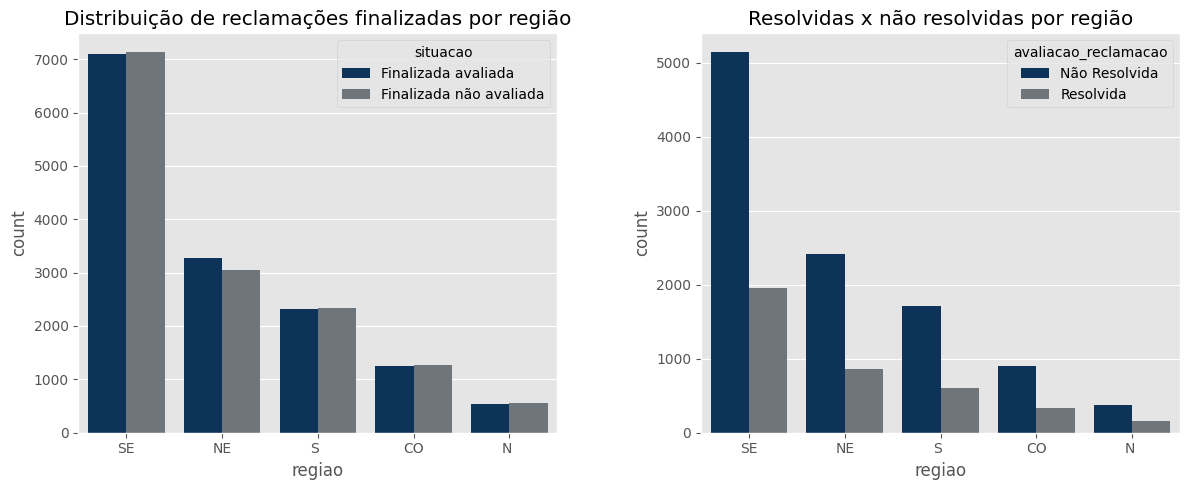

In [60]:
complaints_status = data_segment[data_segment['avaliacao_reclamacao'] != 'Não Avaliada']


fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

sns.countplot(ax=axes[0], data=data_segment, x='regiao', 
              palette=['#003366', '#6c757d'], 
              order=recurrence_by_region.index, 
              hue=data_segment['situacao'])

axes[0].set_title('Distribuição de reclamações finalizadas por região')

complaints_status = data_segment[data_segment['avaliacao_reclamacao'] != 'Não Avaliada']
sns.countplot(ax=axes[1], data=complaints_status, x='regiao', 
              palette=['#003366', '#6c757d'], 
              order=recurrence_by_region.index, 
              hue=complaints_status['avaliacao_reclamacao'])

axes[1].set_title('Resolvidas x não resolvidas por região')


plt.tight_layout()
fig.subplots_adjust(wspace=0.3)  



Somente a região nordeste possui o número de reclamações avaliadas maior que as não avaliadas.

Em todas as regiões, o número de reclamações avaliadas como não resolvidas supera as resolvidas.


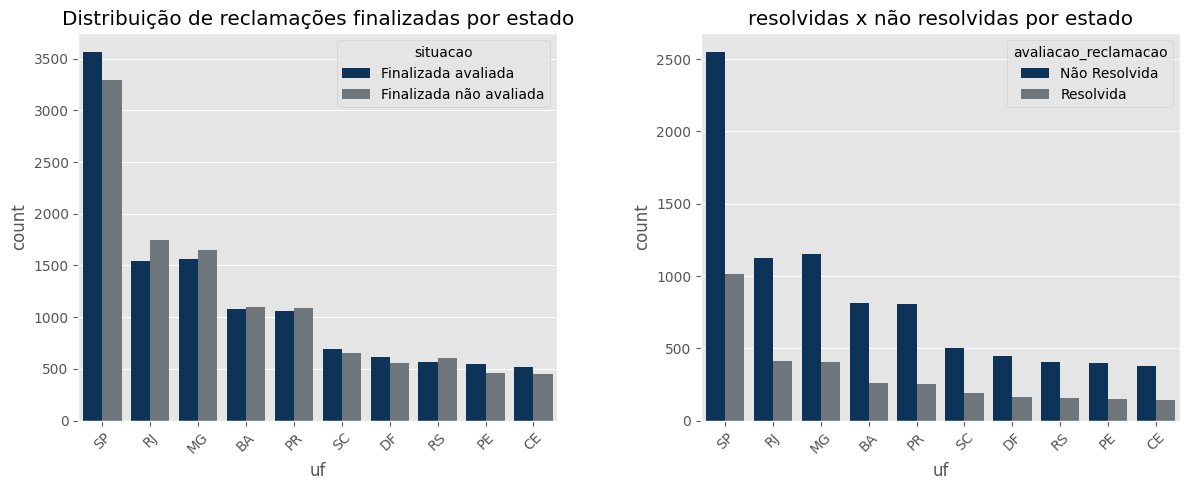

In [61]:
top_recurrence_by_state = recurrence_by_state.head(10)
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

sns.countplot(ax=axes[0], data=data_segment, x='uf', 
              palette=['#003366', '#6c757d'], 
              order=top_recurrence_by_state.index, 
              hue=data_segment['situacao'])

axes[0].set_title('Distribuição de reclamações finalizadas por estado')
axes[0].tick_params("x",labelrotation=45)

sns.countplot(ax=axes[1], data=complaints_status, x='uf', 
              palette=['#003366', '#6c757d'], 
              order=top_recurrence_by_state.index, 
              hue=complaints_status['avaliacao_reclamacao'])

axes[1].set_title('resolvidas x não resolvidas por estado')
axes[1].tick_params("x",labelrotation=45)

plt.tight_layout()
fig.subplots_adjust(wspace=0.3)  


Dos 10 estados com mais reclamaçẽos, Rio de Janeiro, Minas Gerais, Bahia, Paraná e Rio Grande do sul possuem mais reclamações sem avaliações, em comparação com as avaliadas. 

Em todos estados, há mais avaliações não resolvidas, que resolvidas.


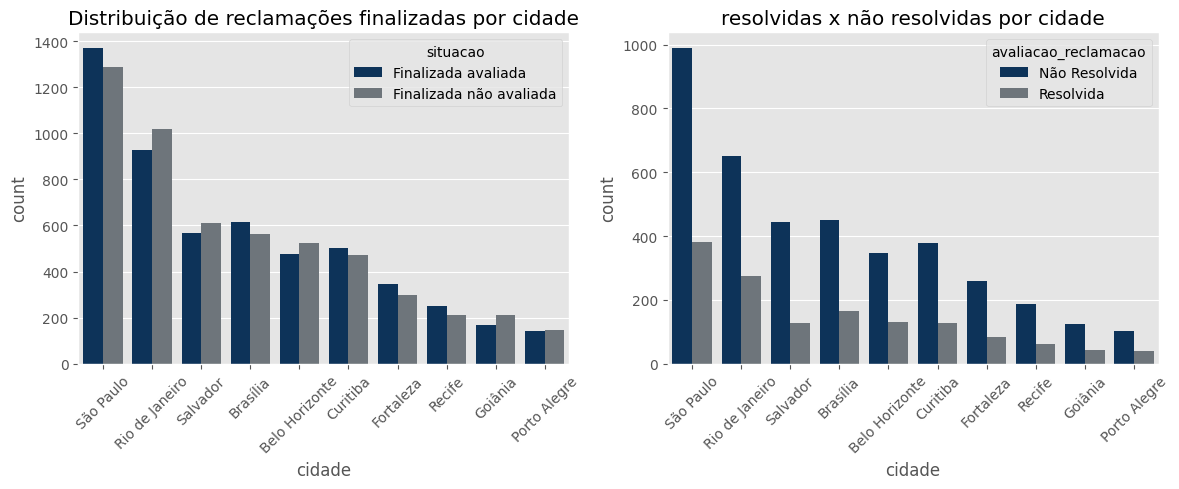

In [64]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(ax=axes[0], data=data_segment, x='cidade', 
              palette=['#003366', '#6c757d'], 
              order=recurrence_by_city.index, 
              hue=data_segment['situacao'])

axes[0].set_title('Distribuição de reclamações finalizadas por cidade')
axes[0].tick_params("x",labelrotation=45)

sns.countplot(ax=axes[1], data=complaints_status, x='cidade', 
              palette=['#003366', '#6c757d'], 
              order=recurrence_by_city.index, 
              hue=complaints_status['avaliacao_reclamacao'])

axes[1].set_title('resolvidas x não resolvidas por cidade')


plt.tight_layout()
fig.subplots_adjust(wspace=0.2)
axes[1].tick_params("x",labelrotation=45)


Das cidades, apenas Rio de Janeiro, Salvador, Belo Horizonte e Goiânia possuem mais reclamações finalizadas sem avaliação, que as avaliadas. 

Em todas as cidades, há mais avaliações não resolvidas, que resolvidas.


________

***3° Pergunta*** 
- Como a satisfação dos consumidores varia entre diferentes regiões?

Para mensurar a satisfação dos consumidores, criaremos um novo conjunto de dados apenas com as reclamações avaliadas.


Após isso, veremos a média da nota por região.

In [65]:
filtered_region = data_segment[data_segment['situacao'] == 'Finalizada avaliada']

customer_review = (filtered_region
                   .groupby('regiao')['nota_do_consumidor']
                   .mean()
                   .reset_index()
                   .sort_values('nota_do_consumidor',ascending=False))


customer_review

,regiao,nota_do_consumidor
1,N,2.099437
4,SE,2.007888
0,CO,1.994391
2,NE,1.952541
3,S,1.948729


A região Norte possui a maior  média de nota, e todas as regiões possuem uma média maior,  ou igual a 1.94.

### 2.2 - Análise da satisfação do consumidor

***1° Pergunta***
- Quais assuntos recebem o maior número de reclamações? E como as avaliações positivas se comparam às negativas nesses assuntos?

In [75]:
data_segment['assunto'].value_counts().head(10)

assunto
Aparelho celular                                                                                                                12328
Televisão                                                                                                                        6323
Microcomputador e laptops                                                                                                        2338
Acessórios e periféricos (monitor, impressora, pendrive, hd externo, cd dvd, outras midias, roteador, software, scanner etc)     2320
Aparelho de som, video e imagem ( Câmera, filmadora, dvd, home theater etc)                                                      1009
Ar condicionado, ventilador e aquecedor                                                                                           850
Demais aparelhos de comunicação                                                                                                   805
Lavadora de roupa, louça e secadora                   

/tmp/ipykernel_27825/42595913.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(shortened_labels)


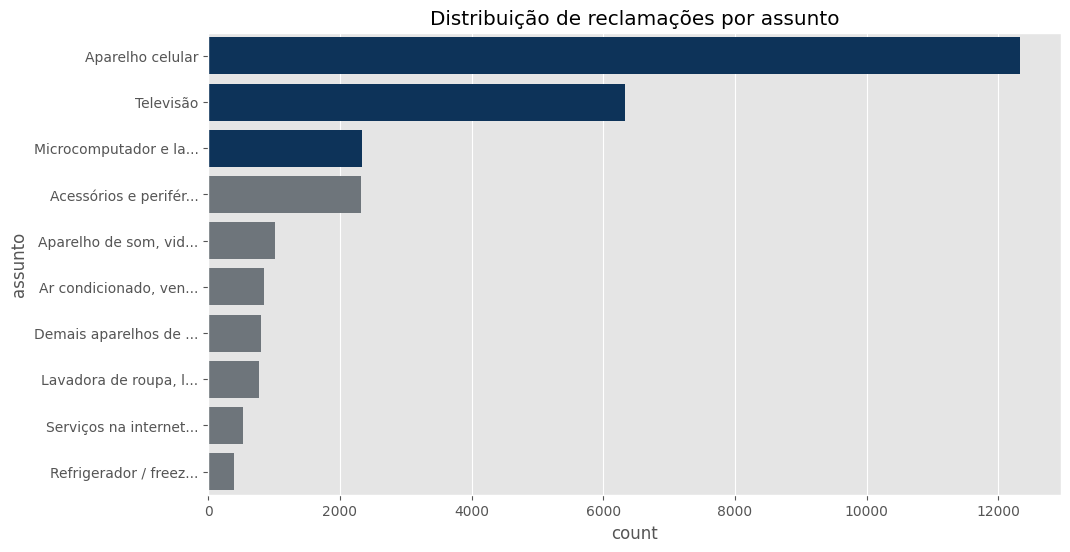

In [80]:
#função para ajustar o tamanho dos rótulos
def shorten_label(label, max_length=20):
    return label[:max_length] + '...' if len(label) > max_length else label


recurrence_by_subject = data_segment['assunto'].value_counts().head(10)
shortened_labels = [shorten_label(label) for label in recurrence_by_subject.index]


ax = sns.countplot(
    data=data_segment, 
    y='assunto', 
    orient='h',  
    palette=[
        '#003366', '#003366', '#003366', '#6c757d', '#6c757d',
        '#6c757d', '#6c757d', '#6c757d', '#6c757d', '#6c757d'
    ], 
    order=recurrence_by_subject.index  
)


ax.set_yticklabels(shortened_labels)

ax.set_title('Distribuição de reclamações por assunto')
ax.figure.set_size_inches(11, 6)


As reclamações com assuntos relacionados a celulares, televisões e computadores/laptops lideram o ranking.

/tmp/ipykernel_27825/1891549756.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(shortened_labels, rotation=45, horizontalalignment='right')


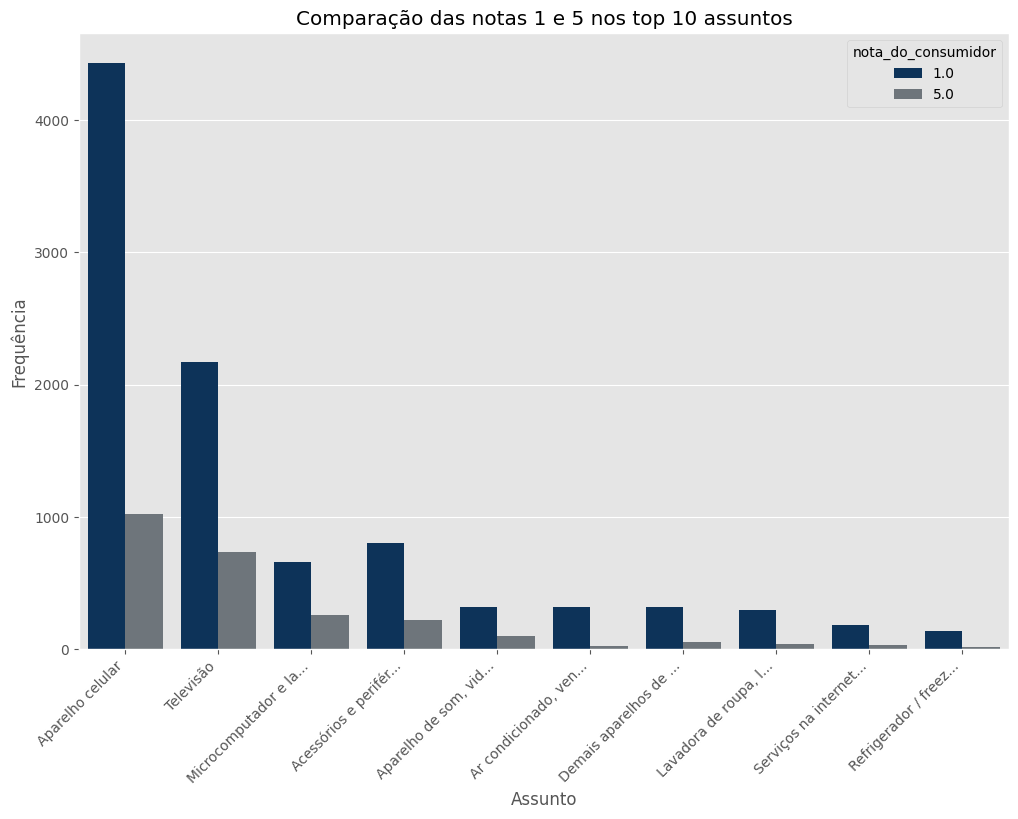

In [92]:

subject_by_evaluation = data_segment[data_segment['nota_do_consumidor'].isin([1, 5])]

filtered_data_top_subject = subject_by_evaluation[
    subject_by_evaluation['assunto'].isin(recurrence_by_subject.index)
]



plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=filtered_data_top_subject, 
    x='assunto', 
    hue='nota_do_consumidor',
    palette=['#003366', '#6c757d'], 
    order=recurrence_by_subject.index.tolist() 
    )


ax.set_xlabel('Assunto')
ax.set_ylabel('Frequência')
ax.set_title('Comparação das notas 1 e 5 nos top 10 assuntos')
_ = ax.set_xticklabels(shortened_labels, rotation=45, horizontalalignment='right')


Nenhum desses assuntos possui mais notas 1 que 5.

_____

***2° Pergunta***
- Existe correlação entre o "Tempo Resposta" e a "Nota do Consumidor"?

In [95]:
data_segment[['tempo_resposta','nota_do_consumidor']].corr()

,tempo_resposta,nota_do_consumidor
tempo_resposta,1.000000,0.112637
nota_do_consumidor,0.112637,1.000000


A correlação entre ```Tempo Resposta``` e ``` Nota do Consumidor``` é quase inexistente.

______

***3° Pergunta***
- Como as notas variam entre diferentes gêneros?

<Axes: xlabel='nota_do_consumidor', ylabel='Count'>

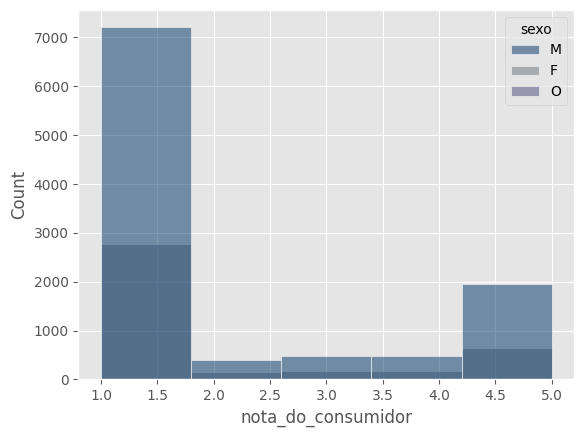

In [96]:

sns.histplot(data=data_segment, x='nota_do_consumidor', hue='sexo',bins=5,palette=['#003366', '#6c757d', '#4A4A7A']) 


Existe o maior número de notas 1 se comparado às demais, indicando que ainda que as reclamações sejam resolvidas, o consumidor não fica completamente satisfeito. 

### 2.3 - Perfil dos consumidores 

***1° Pergunta***

Como a distribuição das faixas etárias dos consumidores varia entre diferentes regiões?



In [98]:
crosstab_ages = round(pd.crosstab(data_segment['faixa_etaria'], data_segment['regiao'], normalize='index'),2)
crosstab_ages

regiao,CO,N,NE,S,SE
faixa_etaria,,,,,
até 20 anos,0.07,0.03,0.24,0.18,0.48
entre 21 a 30 anos,0.09,0.04,0.25,0.16,0.46
entre 31 a 40 anos,0.09,0.04,0.22,0.17,0.48
entre 41 a 50 anos,0.09,0.03,0.19,0.16,0.53
entre 51 a 60 anos,0.08,0.03,0.20,0.16,0.54
entre 61 a 70 anos,0.05,0.03,0.19,0.13,0.60
mais de 70 anos,0.07,0.03,0.18,0.16,0.56


Para todas as faixas etárias, mais de 45% dos consumidores residem no sudeste brasileiro.

___

***2° pergunta***

- Quantos consumidores fizeram contato  com a empresa  antes de  procurarem o  consumidor.gov?

<Axes: xlabel='procurou_empresa', ylabel='count'>

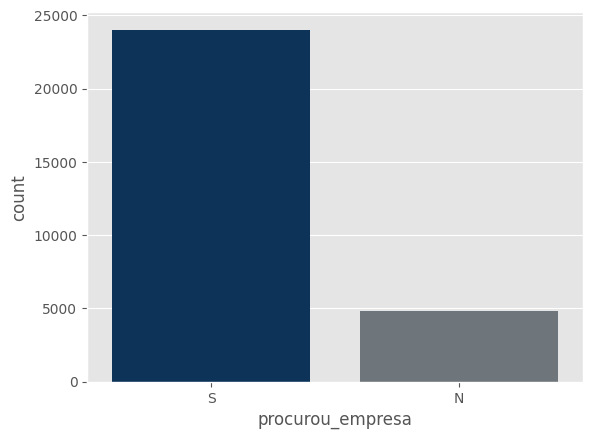

In [99]:
sns.countplot(data=data_segment, x='procurou_empresa', palette=['#003366', '#6c757d'])

83% dos consumidores procuraram a empresa antes de buscarem auxilio no consumidor.gov.


Se a empresa tivesse resolvido o problema no contato anteriormente, não seria necessário empregar esforços por meio da plataforma, economizando tempo e  energia da  empresa e cliente. 

_____

***3° Pergunta***

Em quais meses os consumidores registraram mais reclamações? 

Como a coluna ```Data Finalização``` está categorizada como ```object```, iremos convertê-la para ```datetime```, que é o tipo dados correto para registros de datas.

In [101]:
data_segment['data_finalizacao']= pd.to_datetime(data_segment['data_finalizacao'])

/tmp/ipykernel_27825/3662353668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_segment['data_finalizacao']= pd.to_datetime(data_segment['data_finalizacao'])


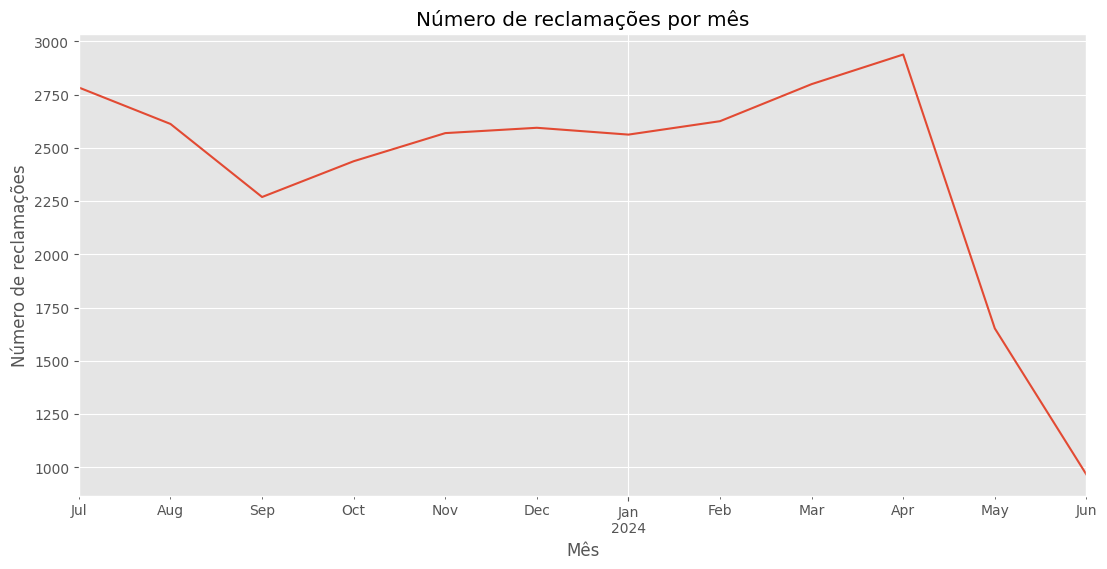

In [103]:
monthly_data = data_segment.groupby(data_segment['data_finalizacao'].dt.to_period('M')).size()
monthly_data_group = pd.DataFrame(monthly_data)

monthly_data_group.plot(kind='line', title='Número de reclamações por mês', legend=False,figsize=(13,6))
plt.xlabel('Mês')
_=plt.ylabel('Número de reclamações')

Em abril, observamos o maior número de reclamações, com um pico significativo de 2.938 mil reclamalções. 


# Conclusão

Após a análise, esses são os principais insights que nos mostram os dados:

   - A região Sudeste lidera o número de reclamações, com São Paulo como o estado e cidade com mais registros. Este padrão era esperado, dada a maior população da região.

   - Apesar de a maioria das reclamações serem avaliadas e resolvidas, há exceções, como nos estados do Sul e em Manaus, onde as reclamações não avaliadas superam as avaliadas.

   - O segmento bancário lidera em número de reclamações, mas nem sempre as maiores reclamações estão associadas às piores avaliações. Segmentos como Telecomunicações e Transporte Aéreo se destacam por terem mais avaliações positivas que negativas.

   - Não há correlação significativa entre o tempo de resposta das empresas e as notas dos consumidores, sugerindo que outros fatores podem ser mais determinantes para a satisfação.

   - A variação das notas entre os gêneros segue o mesmo padrão, com notas extremas (1 e 5) sendo mais comuns, indicando que os consumidores tendem a avaliar quando estão muito satisfeitos ou insatisfeitos.

   - O Sudeste concentra a maior parte dos consumidores em todas as faixas etárias.

   - A maioria dos consumidores tentou resolver o problema diretamente com a empresa antes de recorrer ao **Consumidor.gov**, o que indica que as empresas poderiam evitar muitos desses conflitos se agissem de forma mais eficaz no primeiro contato.

   - Abril foi o mês com o maior número de reclamações.

In [109]:
data_segment.to_csv('../data/processed/dados_consumidor_gov_anual.csv', index=False)
